# Preprocessing price changes part 1

1. Split into different years and make data comparable
2. Add daily changes
3. Sum up daily changes for each company to get an aggregated daily change

import necessary modules and load the prices split adjusted dataset:

In [1]:
import pandas as pd
import numpy as np
import io

adjustedPrices = pd.read_csv("./prices-split-adjusted.csv")
print("Shape: ", adjustedPrices.shape)
print("Columns: ", adjustedPrices.columns)
adjustedPrices.head(5)

Shape:  (851264, 7)
Columns:  Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


### The data set is from year 2011 to 2016
The 'symbol' is the company ticker.
Let us find out how many companies there are in the dataset. As it is supposed to be S&P 500 it should be 500, or close to it.

In [2]:
np.unique(adjustedPrices['symbol']).shape

(501,)

## How many recorded dates between 2011-01-02 and 2016-12-31 for each unique company in the dataset?
As stated above, one sample is one specific day for a specific company.
Let us find out if all companies have the same amount of recorded dates.


In [3]:
uniques = np.unique(adjustedPrices['symbol'], return_counts=True)
print("[Recorded dates]: [amount of companies]", np.unique(uniques[1], return_counts=True))

[Recorded dates]: [amount of companies] (array([ 126,  251,  284,  304,  378,  385,  504,  786,  853,  892,  894,
        896,  987, 1008, 1540, 1683, 1761, 1762]), array([  1,   1,   1,   1,   2,   1,   4,   1,   1,   2,   1,   1,   1,
        13,   1,   1,   1, 467]))


### Drop the companies that have less than 1762 days of recorded price.
So this means there are 467 companies that have 1762 entries in the database. This probably means they have been on the list all the time between start of recording until the end. To compare the trends it would be good to have equally many entries for each company.

In [4]:
companies = uniques[0][uniques[1] > 1761 ]
print("Companies that have 1762 recored days are: ", companies )

companies_to_be_dropped = uniques[0][uniques[1] < 1762 ]
normalized_companies = adjustedPrices
for x,label in enumerate(companies_to_be_dropped):
    normalized_companies = normalized_companies[normalized_companies.symbol != label]
    
print("We have droped : ", len(adjustedPrices) - len(normalized_companies), "entries")


Companies that have 1762 recored days are:  ['A' 'AAL' 'AAP' 'AAPL' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP' 'ADS'
 'ADSK' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG' 'AKAM'
 'ALB' 'ALK' 'ALL' 'ALXN' 'AMAT' 'AME' 'AMG' 'AMGN' 'AMP' 'AMT' 'AMZN'
 'AN' 'ANTM' 'AON' 'APA' 'APC' 'APD' 'APH' 'ARNC' 'ATVI' 'AVB' 'AVGO'
 'AVY' 'AWK' 'AXP' 'AYI' 'AZO' 'BA' 'BAC' 'BAX' 'BBBY' 'BBT' 'BBY' 'BCR'
 'BDX' 'BEN' 'BHI' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C'
 'CA' 'CAG' 'CAH' 'CAT' 'CB' 'CBG' 'CBS' 'CCI' 'CCL' 'CELG' 'CERN' 'CF'
 'CHD' 'CHK' 'CHRW' 'CI' 'CINF' 'CL' 'CLX' 'CMA' 'CMCSA' 'CME' 'CMG' 'CMI'
 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COH' 'COL' 'COO' 'COP' 'COST' 'CPB' 'CRM'
 'CSCO' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD'
 'DE' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DLR' 'DLTR'
 'DNB' 'DOV' 'DOW' 'DPS' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN' 'EA' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EL' 'EMN' 'EMR' 'ENDP' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES'
 'ESRX' 'ESS'

### Split all data into years for clarity

In [5]:
normalized_companies['date'] = pd.to_datetime(normalized_companies['date'])
def getPricesYear(startDate, endDate):
    mask = (normalized_companies['date'] >= startDate) & (normalized_companies['date'] <= endDate)
    return normalized_companies[mask]

prices11 = getPricesYear(pd.Timestamp(2011,1,1), pd.Timestamp(2011,12,31))
prices12 = getPricesYear(pd.Timestamp(2012,1,1), pd.Timestamp(2012,12,31))
prices13 = getPricesYear(pd.Timestamp(2013,1,1), pd.Timestamp(2013,12,31))
prices14 = getPricesYear(pd.Timestamp(2014,1,1), pd.Timestamp(2014,12,31))
prices15 = getPricesYear(pd.Timestamp(2015,1,1), pd.Timestamp(2015,12,31))
prices16 = getPricesYear(pd.Timestamp(2016,1,1), pd.Timestamp(2016,12,31))

In [6]:
print("All prices for year 2011")
print("Shape: ", prices11.shape)


print("All prices for year 2012")
print("shape: ", prices12.shape)


print("All prices for year 2013")
print("shape: ", prices13.shape)


print("All prices for year 2014")
print("shape: ", prices14.shape)

print("All prices for year 2015")
print("shape: ", prices14.shape)


print("All prices for year 2016")
print("shape: ", prices16.shape)
prices16.head()



All prices for year 2011
Shape:  (117684, 7)
All prices for year 2012
shape:  (116750, 7)
All prices for year 2013
shape:  (117684, 7)
All prices for year 2014
shape:  (117684, 7)
All prices for year 2015
shape:  (117684, 7)
All prices for year 2016
shape:  (117684, 7)


,date,symbol,open,close,low,high,volume
725390,2016-01-04,A,41.060001,40.689999,40.340000,41.189999,3287300.0
725391,2016-01-04,AAL,41.290001,40.910000,40.299999,41.349998,12037200.0
725392,2016-01-04,AAP,149.250000,152.240005,147.509995,154.479996,1935300.0
725393,2016-01-04,AAPL,102.610001,105.349998,102.000000,105.370003,67649400.0
725395,2016-01-04,ABC,102.309998,101.870003,101.290001,102.639999,2327000.0


Year 12 has less recorded dates. Let us examine each year a little bit more.

---

## How many entries does every company have in each year?

### 2011

In [7]:
uniques = np.unique(prices11['symbol'], return_counts=True)
print("Days: Companies", np.unique(uniques[1],return_counts=True))

Days: Companies (array([252]), array([467]))


### 2012

In [8]:
uniques = np.unique(prices12['symbol'], return_counts=True)
print("Days: Companies", np.unique(uniques[1],return_counts=True))


Days: Companies (array([250]), array([467]))


There is a different amount of entries for all companies.

### 2013

In [9]:
uniques = np.unique(prices13['symbol'], return_counts=True)
print("Days: Companies", np.unique(uniques[1],return_counts=True))

Days: Companies (array([252]), array([467]))


### 2014

In [10]:
uniques = np.unique(prices14['symbol'], return_counts=True)
print("Days: Companies", np.unique(uniques[1],return_counts=True))

Days: Companies (array([252]), array([467]))


### 2015 

In [11]:
uniques = np.unique(prices15['symbol'], return_counts=True)
print("Days: Companies", np.unique(uniques[1],return_counts=True))

Days: Companies (array([252]), array([467]))


### 2016

In [12]:
uniques = np.unique(prices16['symbol'], return_counts=True)
print("Days: Companies", np.unique(uniques[1],return_counts=True))

Days: Companies (array([252]), array([467]))


***
## Adding price changes to the data
 If we want to predict the changes in prices, then we need an extra column of the daily changes.

The indexes are not starting from 0 as we have sliced the first dataframe. Let us reset them to normal.

In [13]:
prices11 = prices11.reset_index()
prices12 = prices12.reset_index()
prices13 = prices13.reset_index()
prices14 = prices14.reset_index()
prices15 = prices15.reset_index()
prices16 = prices16.reset_index()

In [14]:
def addPriceChanges(dff):
    priceChange = []
    for x in dff.index:
        sample = dff.iloc[x]
        op = sample['open']  #open price
        cl = sample['close'] #closing price
        change = ((op - cl) / op) * 100  #calculate and convert to percent
        priceChange.append(change)


    #Create a numpy array of it
    priceChange_np = np.array(priceChange)
    

    #append the priceChanges to each row
    prices_New = np.append(dff, priceChange_np[:,np.newaxis], axis=1)


    #Create a new dataframe with the daily changes
    prices_with_changes = pd.DataFrame(data=prices_New, columns=np.append(dff.columns, ['change']))
    
    return prices_with_changes

prices11_with_changes = addPriceChanges(prices11)
prices12_with_changes = addPriceChanges(prices12)
prices13_with_changes = addPriceChanges(prices13)
prices14_with_changes = addPriceChanges(prices14)
prices15_with_changes = addPriceChanges(prices15)
prices16_with_changes = addPriceChanges(prices16)

### Let's plot the daily price changes from opening to closing for Apple 2011

In [15]:
appl2011 = prices11_with_changes[prices11_with_changes.symbol == 'AAPL']
appl2011 = appl2011.sort_values(by='date', ascending=True)

appl2012 = prices12_with_changes[prices12_with_changes.symbol == 'AAPL']
appl2012 = appl2012.sort_values(by='date', ascending=True)

appl2013 = prices13_with_changes[prices13_with_changes.symbol == 'AAPL']
appl2013 = appl2013.sort_values(by='date', ascending=True)

appl2014 = prices14_with_changes[prices14_with_changes.symbol == 'AAPL']
appl2014 = appl2014.sort_values(by='date', ascending=True)

appl2015 = prices15_with_changes[prices15_with_changes.symbol == 'AAPL']
appl2015 = appl2015.sort_values(by='date', ascending=True)

appl2016 = prices16_with_changes[prices16_with_changes.symbol == 'AAPL']
appl2016 = appl2016.sort_values(by='date', ascending=True)

/home/douglas/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


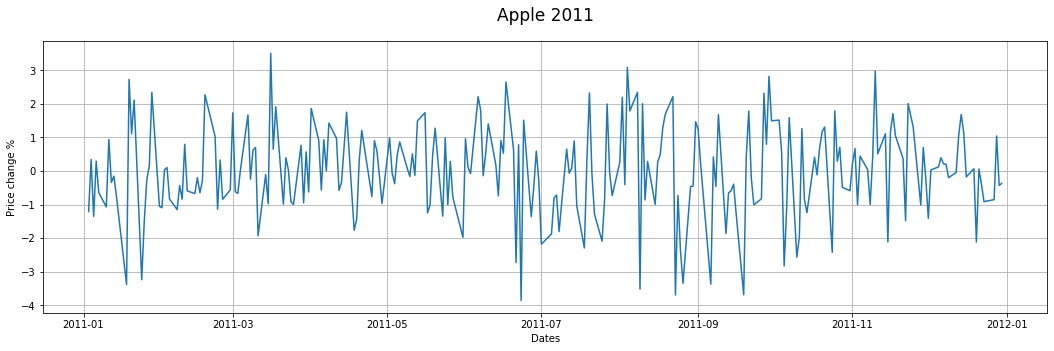

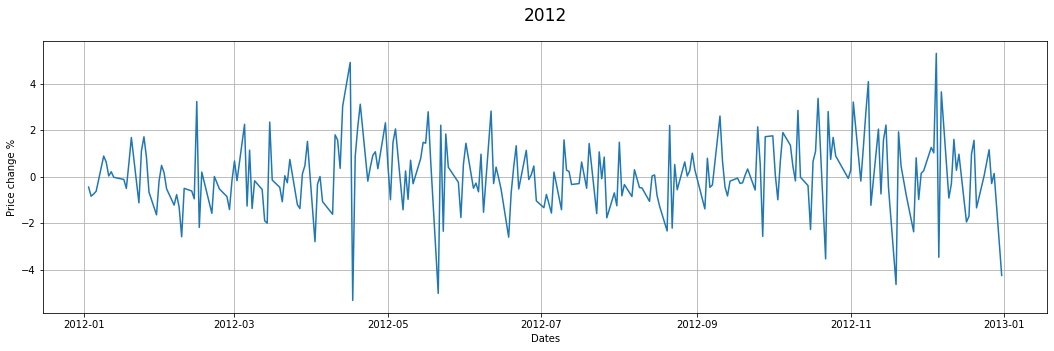

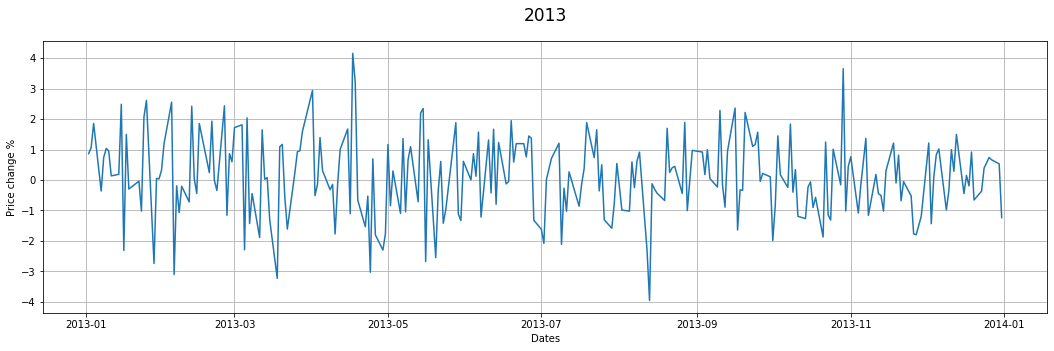

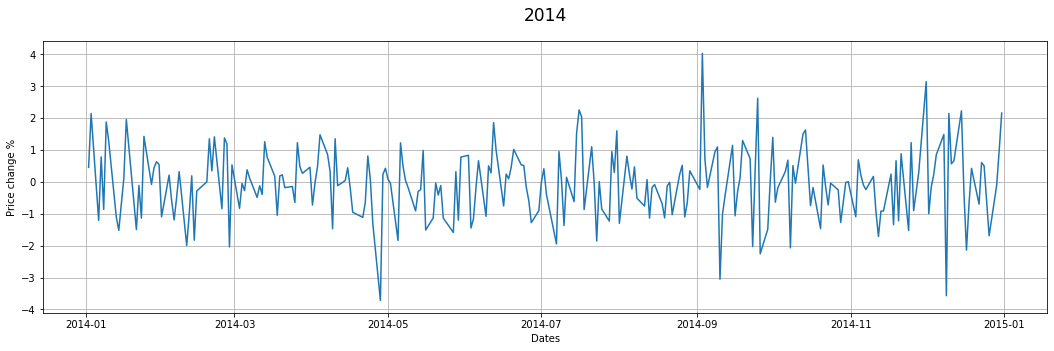

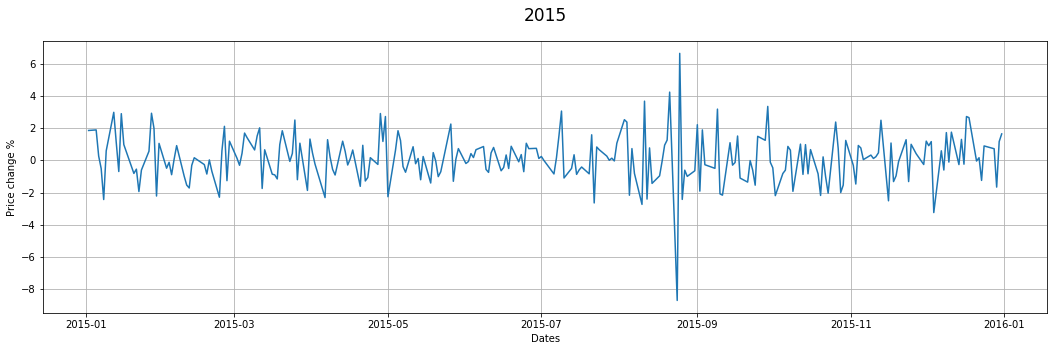

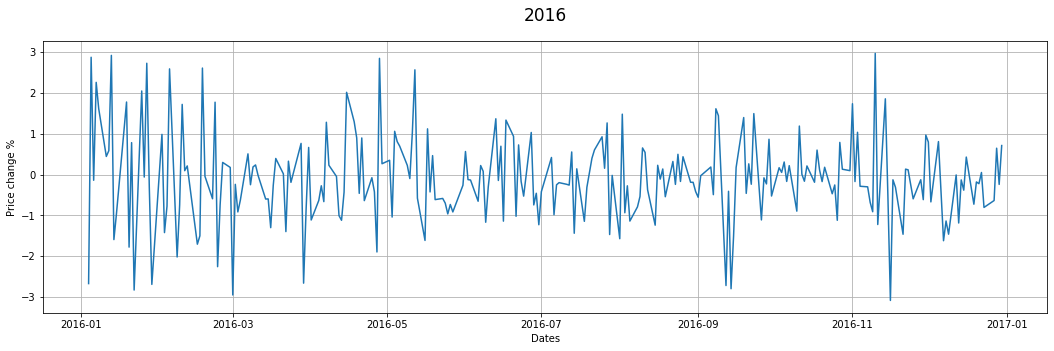

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline  


def getTimeFrame(dataFrame, startDate, endDate):
    mask = (dataFrame['date'] >= startDate) & (dataFrame['date'] <= endDate)
    return dataFrame[mask]

def plotChanges(dff, title):
    plt.figure(figsize=(18,5))
    plt.grid()
    plt.plot(dff['date'].values, dff['change'].values)
    plt.title(title , fontsize=17, pad=20)
    plt.xlabel('Dates')
    plt.ylabel('Price change %')

##Get price change for each year
plotChanges(appl2011, "Apple 2011")
plotChanges(appl2012, "2012")
plotChanges(appl2013, "2013")
plotChanges(appl2014, "2014")
plotChanges(appl2015, "2015")
plotChanges(appl2016, "2016")



The data is noisy and no direct trend could be seen. Let us examine a month instead to look closer. We define a helper function to get the relevant samples from a time frame, and also a helper function to plot the changes in a DataFrame.
@{We haven't done that. Should we just erase this cell? We don't have much time left.}

## Encode labels

Could it be possible to predict price change of one day in some direction? One way to predict the next arbitrary token in a sequence is through training a ***Recurrent Neural Network***. It is ***not*** as interesting to predict the exact price change Xn after a sequence of price changes [X1, X2..Xn], as it is to see if Xn is positive or negative. If a neural network is able to predict the change, a trading strategy would be able to to rely on it.

However, the sequence does not have any clear cycles and most of the price changes look random.

Let us label every price change as either positive or negative.
#### negative (0)  = if (priceChange < 0)

#### positive  (1) =  if (priceChange >= 0 ))


## Add stability label

(array([0, 1], dtype=object), array([61485, 56199]))
(array([0, 1], dtype=object), array([59172, 58512]))
(array([0, 1], dtype=object), array([60514, 57170]))
(array([0, 1], dtype=object), array([62121, 55563]))
(array([0, 1], dtype=object), array([59994, 56756]))
(array([0, 1], dtype=object), array([58759, 58925]))


<Figure size 432x288 with 0 Axes>

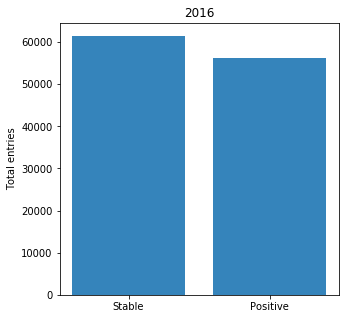

<Figure size 432x288 with 0 Axes>

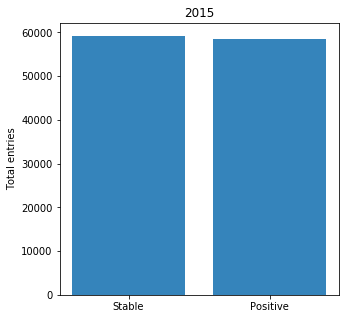

<Figure size 432x288 with 0 Axes>

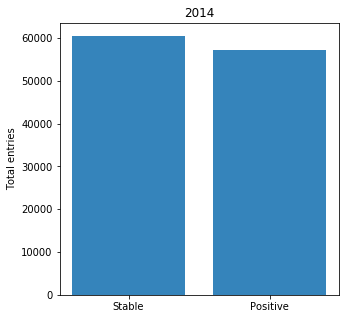

<Figure size 432x288 with 0 Axes>

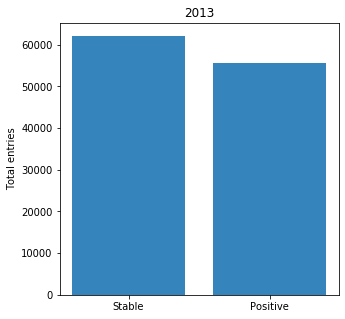

<Figure size 432x288 with 0 Axes>

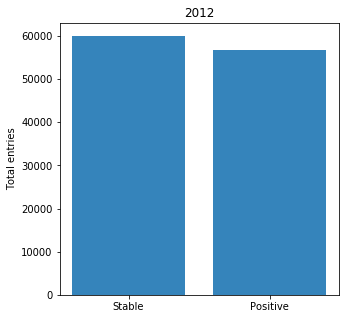

<Figure size 432x288 with 0 Axes>

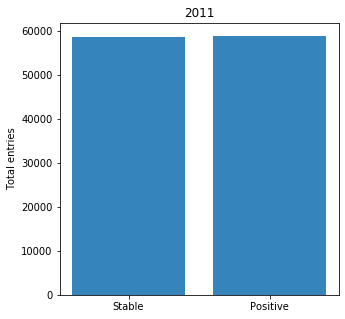

In [50]:
stabilityState = 0 #can be 0 or 1
def setChangeStability(dataFrame): #This is almost identical to addPriceChanges
    changes = dataFrame.change
    changeStability = []
   
    for x in changes:
        if (x < 0):
            stabilityState = 0
        else:
            stabilityState = 1
        changeStability.append(stabilityState)
      
    changeStability_np = np.array(changeStability)
    
    changes_new = np.append(dataFrame, changeStability_np[:,np.newaxis], axis = 1)
    
    changes_with_stability = pd.DataFrame(data=changes_new, columns=np.append(dataFrame.columns, ['stability']))
    
    return changes_with_stability

prices16_with_stability = setChangeStability(prices16_with_changes) 
prices15_with_stability = setChangeStability(prices15_with_changes) 
prices14_with_stability = setChangeStability(prices14_with_changes) 
prices13_with_stability = setChangeStability(prices13_with_changes) 
prices12_with_stability = setChangeStability(prices12_with_changes) 
prices11_with_stability = setChangeStability(prices11_with_changes) 


def plotStability(dataFrame, title):
    plt.figure()
    xLabels = ('Negative', 'Positive')
    yPos = np.arange(len(xLabels))
    yEntries = [0, 0]
    uniques = np.unique(dataFrame.stability, return_counts=True)
    print(uniques)
    yEntries[0] = uniques[1][0]
    yEntries[1] = uniques[1][1]
    plt.figure(figsize = (5,5))
    plt.bar(yPos, yEntries, align = 'center', alpha = 0.9)
    plt.xticks(yPos, xLabels)
    plt.ylabel("Total entries")
    plt.title(title)
    plt.plot()
    
    
plotStability(prices16_with_stability, "2016")
plotStability(prices15_with_stability, "2015")
plotStability(prices14_with_stability, "2014")
plotStability(prices13_with_stability, "2013")
plotStability(prices12_with_stability, "2012")
plotStability(prices11_with_stability, "2011")

## Aggregated daily price changes

In [51]:
normalized_all_prices = prices11_with_stability.append(prices12_with_stability).append(prices13_with_stability).append(prices14_with_stability).append(prices15_with_stability).append(prices16_with_stability)

print(normalized_all_prices.iloc[:5,:])

print(normalized_all_prices.iloc[-5:,:])

    index       date symbol     open    close      low     high       volume  \
0  118389 2011-01-03      A  29.7282  29.9571  29.6209  30.1431    4.994e+06   
1  118390 2011-01-03    AAL    10.11    10.65    10.08    10.71   7.4658e+06   
2  118391 2011-01-03    AAP     66.5     65.5    65.47    66.74       826400   
3  118392 2011-01-03   AAPL    46.52  47.0814  46.4057    47.18  1.11285e+08   
4  118393 2011-01-03    ABC    34.26    34.32    34.25    34.88   2.6078e+06   

     change stability  
0 -0.769966         0  
1  -5.34125         0  
2   1.50376         1  
3  -1.20685         0  
4 -0.175137         0  
         index       date symbol    open  close     low    high      volume  \
117679  851257 2016-12-30   YHOO   38.72  38.67   38.43      39  6.4316e+06   
117680  851258 2016-12-30    YUM   63.93  63.33   63.16   63.94  1.8871e+06   
117681  851259 2016-12-30    ZBH  103.31  103.2  102.85  103.93      973800   
117682  851260 2016-12-30   ZION   43.07  43.04   42.69   4

## Aggregated price changes from 2011 to 2016 S&P 500

In [52]:

from datetime import date, timedelta

#Get the average column value of all unique companies for each day.
def getDailyAverages(pricesDataFrame, startDate, endDate, td, pathName):  
    dailyAverages =[] #Data to append to a new dataframe
    start_date = startDate
    end_date = endDate
    fields = ['open','close','low','high','volume','change']
    fieldsAverages = [] #Average value of a field
    delta = timedelta(days=td) #The amount of time that will be added to start_date in the loop below (in this case, td days)
    while start_date <= end_date:
        #Get a subset of all entries for a particular day.
        day = pricesDataFrame[pricesDataFrame['date'] == str(start_date)]
        for field in fields:
            #get average of all values in a field
            dailyField = sum(day[field] / len(day))
            fieldsAverages.append(dailyField)
        #Append a row of all data that will be added to a new dataframe (date,open,close,low,high,volume,change)
        dailyAverages.append([[str(start_date)],[fieldsAverages[0]],[fieldsAverages[1]],[fieldsAverages[2]],[fieldsAverages[3]],[fieldsAverages[4]],[fieldsAverages[5]]])
        fieldsAverages = [] #reset fieldsAverages so it can be used again in the loop.
        start_date += delta #add a day
    
    dailyAverages = np.array(dailyAverages).reshape((len(dailyAverages)) ,7)
    dailyAverages_without_zeroes = np.empty([0,7])
    for x,value in enumerate(dailyAverages):
        if dailyAverages[x][1] != str(0):
            dailyAverages_without_zeroes = np.append(dailyAverages_without_zeroes,[dailyAverages[x]], axis=0)
    
    df = pd.DataFrame(data= dailyAverages_without_zeroes, columns=['date','open','close','low','high','volume','change'])

    #Make sure fields have an appropriate data type
    df['open'] = df['open'].apply(pd.to_numeric)
    df['close'] = df['close'].apply(pd.to_numeric)
    df['low'] = df['low'].apply(pd.to_numeric)
    df['high'] = df['high'].apply(pd.to_numeric)
    df['volume'] = df['volume'].apply(pd.to_numeric)
    df['change'] = df['change'].apply(pd.to_numeric)
    df['date'] = df['date'].apply(pd.to_datetime)
    df = setChangeStability(df) #Add the average stability
    df.to_csv(pathName, index = False) #Remove if we don't need to save the file
    return df


pricesAverages11 = getDailyAverages(prices11_with_stability, date(2011, 1, 1), date(2011, 12, 31), 1, "preprocessing/pricesAverages11.csv")
pricesAverages12 = getDailyAverages(prices12_with_stability, date(2012, 1, 1), date(2012, 12, 31), 1, "preprocessing/pricesAverages12.csv")
pricesAverages13 = getDailyAverages(prices13_with_stability, date(2013, 1, 1), date(2013, 12, 31), 1, "preprocessing/pricesAverages13.csv")
pricesAverages14 = getDailyAverages(prices14_with_stability, date(2014, 1, 1), date(2014, 12, 31), 1, "preprocessing/pricesAverages14.csv")
pricesAverages15 = getDailyAverages(prices15_with_stability, date(2015, 1, 1), date(2015, 12, 31), 1, "preprocessing/pricesAverages15.csv")
pricesAverages16 = getDailyAverages(prices16_with_stability, date(2016, 1, 1), date(2016, 12, 31), 1, "preprocessing/pricesAverages16.csv")
allPricesAverages = pricesAverages11.append(pricesAverages12).append(pricesAverages13).append(pricesAverages14).append(pricesAverages15).append(pricesAverages16)


print(pricesAverages11.head())







        date     open    close      low     high       volume    change  \
0 2011-01-03  47.0202  47.2107   46.741  47.6336  6.46078e+06 -0.344929   
1 2011-01-04  47.2869   46.867  46.4194  47.5177  6.73889e+06  0.811473   
2 2011-01-05  46.6973  47.1265  46.4527  47.4105  7.07388e+06 -0.913005   
3 2011-01-06   47.154  46.9983  46.5918    47.55  7.43092e+06  0.237169   
4 2011-01-07  47.0919  46.9525  46.4398  47.4358  7.57927e+06  0.259163   

  stability  
0         0  
1         1  
2         0  
3         1  
4         1  


### Plot the aggregated changes over all companies during a day for each year

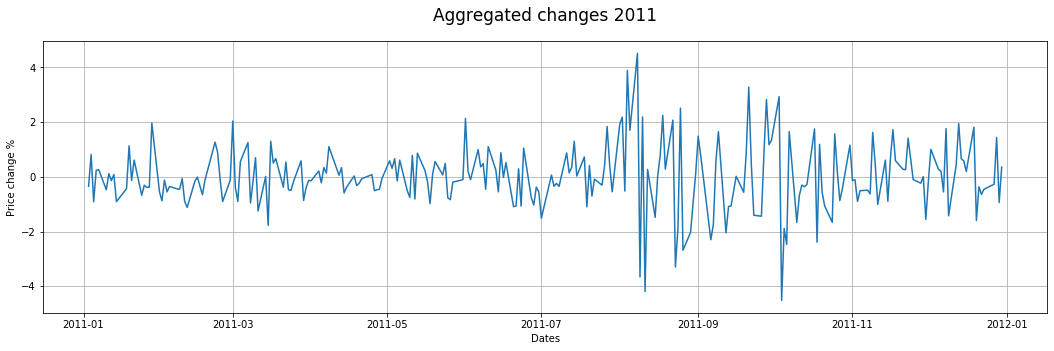

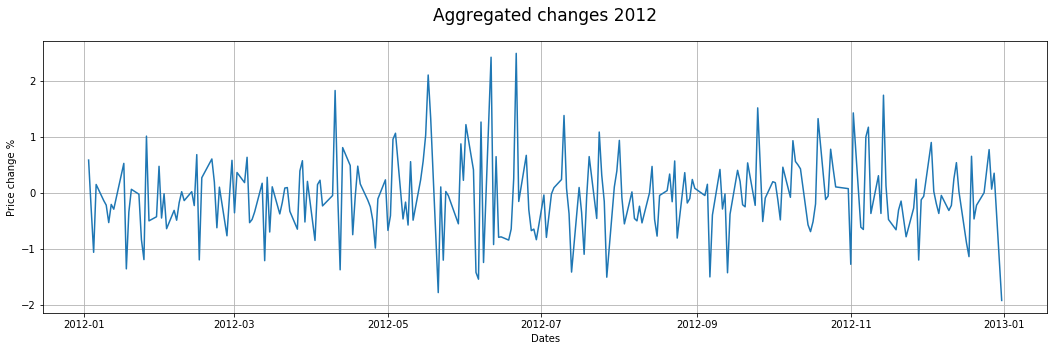

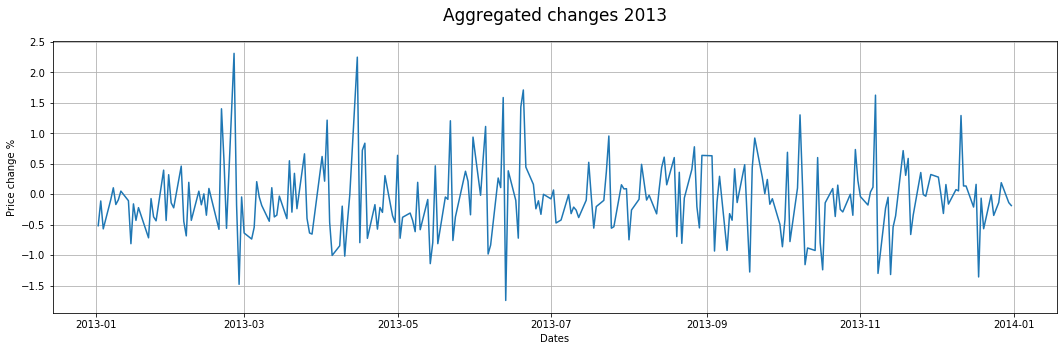

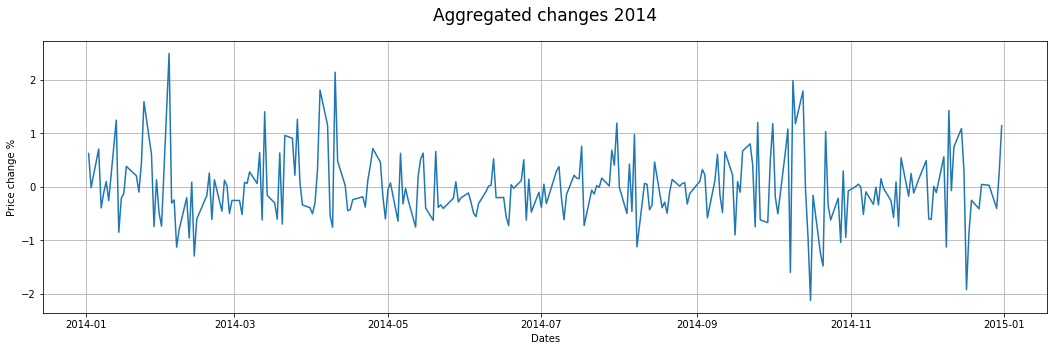

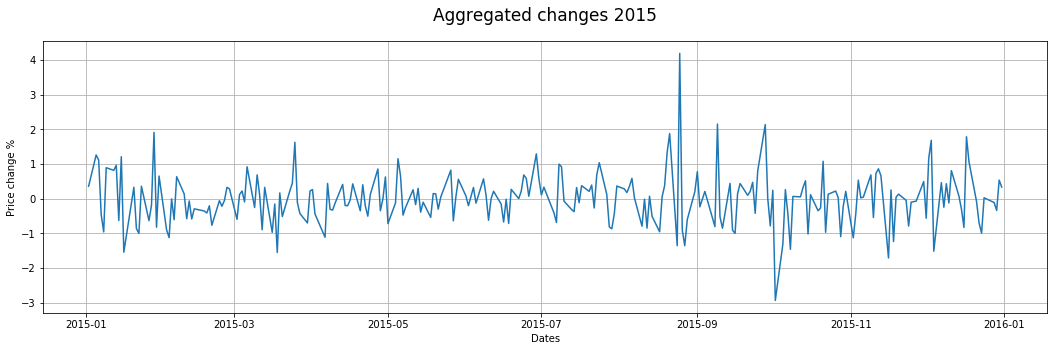

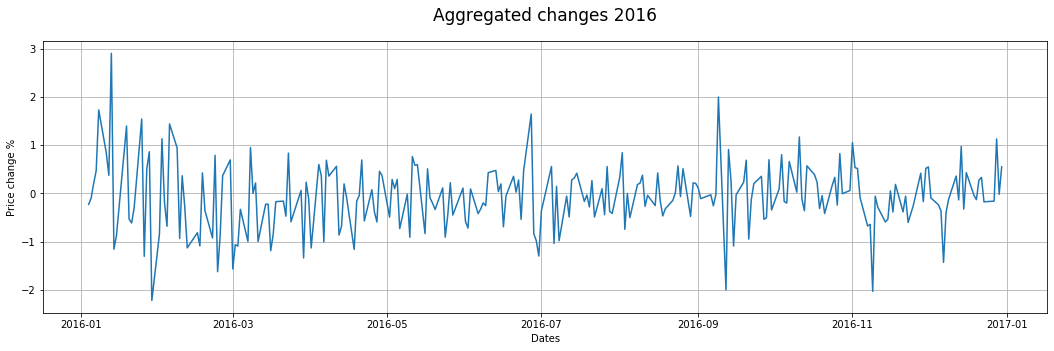

In [53]:
plotChanges(pricesAverages11, "Aggregated changes 2011")
plotChanges(pricesAverages12, "Aggregated changes 2012")
plotChanges(pricesAverages13, "Aggregated changes 2013")
plotChanges(pricesAverages14, "Aggregated changes 2014")
plotChanges(pricesAverages15, "Aggregated changes 2015")
plotChanges(pricesAverages16, "Aggregated changes 2016")



## Finishing and saving the dataframes

Now we have some more clarity of the dataset.

We have split it into each year.
***
We have also dropped all companies that have less than 1762 recorded dates of prices.
***
We have added 2 more columns to the dataframe.
1. Change (percentage change of opening price to closing price)
2. Stabillity (a label for the the magnitude and direction of a day's volatility)

***
We have created a new DataFrame for each year describing the aggregated price change (volatility) each day.

### Let us save those for use in the Neural Network

(array([0, 1], dtype=object), array([836, 674]))


<Figure size 432x288 with 0 Axes>

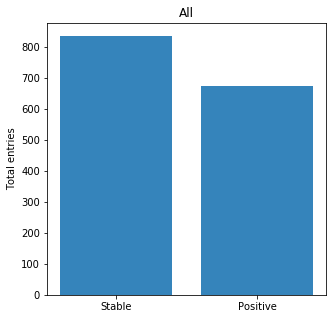

In [54]:
price11 = prices11_with_stability
price12 = prices12_with_stability
price13 = prices13_with_stability
price14 = prices14_with_stability
price15 = prices15_with_stability
price16 = prices16_with_stability


##Save all dataframes as CSV files

#Year split
price11.to_csv('./preprocessing/price11.csv',index=False)
price12.to_csv('./preprocessing/price12.csv',index=False)
price13.to_csv('./preprocessing/price13.csv',index=False)
price14.to_csv('./preprocessing/price14.csv',index=False)
price15.to_csv('./preprocessing/price15.csv',index=False)
price16.to_csv('./preprocessing/price16.csv',index=False)

##Aggregated
normalized_all_prices.to_csv('./preprocessing/pricesAll.csv')



##Aggregated most important
allPricesAverages.to_csv('./preprocessing/all_pricesAverages.csv', index=False)

plotStability(allPricesAverages, "All")
